In [21]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [28]:
tickers_HC = ["CSL.AX", "FPH.AX", "SHL.AX", "RHC.AX", "COH.AX"] # healthcare
tickers_RE = ["GMG.AX", "SCG.AX", "DXS.AX", "MGR.AX", "GPT.AX"] # realestate
tickers_UL = ["APA.AX", "AGL.AX", "AST.AX", "MCY.AX", "MEZ.AX"] # utilities
tickers_CS = ["WOW.AX", "COL.AX", "A2M.AX", "TWE.AX", "CCL.AX"] # comsumer staples
tickers_IT = ["APT.AX", "XRO.AX", "CPU.AX", "WTC.AX", "NXT.AX"] # information Tech 
start = "2018-07-07"
end = "2020-07-07"

In [29]:
#make close/volume dataframe  (5 stocks)(switch = 0 close_price)
def close_volume_data(tickers, start, end, switch):
    #tickers = ["APT.AX", "XRO.AX", "CPU.AX", "WTC.AX", "NXT.AX"]#, "ALU", "APX", "TNE", "PPH", "LNK"]
    data = yf.download(tickers, start, end, group_by="ticker")
    if switch == 0:
            a = pd.DataFrame(data[tickers[0]]["Close"]).rename(columns = {"Close": tickers[0]}) 
            b = pd.DataFrame(data[tickers[1]]["Close"]).rename(columns = {"Close": tickers[1]})
            c = pd.DataFrame(data[tickers[2]]["Close"]).rename(columns = {"Close": tickers[2]})
            d = pd.DataFrame(data[tickers[3]]["Close"]).rename(columns = {"Close": tickers[3]})
            e = pd.DataFrame(data[tickers[4]]["Close"]).rename(columns = {"Close": tickers[4]})
    else:
            a = pd.DataFrame(data[tickers[0]]["Volume"]).rename(columns = {"Volume": tickers[0]}) 
            b = pd.DataFrame(data[tickers[1]]["Volume"]).rename(columns = {"Volume": tickers[1]})
            c = pd.DataFrame(data[tickers[2]]["Volume"]).rename(columns = {"Volume": tickers[2]})
            d = pd.DataFrame(data[tickers[3]]["Volume"]).rename(columns = {"Volume": tickers[3]})
            e = pd.DataFrame(data[tickers[4]]["Volume"]).rename(columns = {"Volume": tickers[4]})
                
        

    data = e.merge(d.merge(c.merge(a.merge(b, on = "Date"), on = "Date"), on = "Date"), on = "Date")
    return data

In [30]:
close_price_IT = close_volume_data(tickers_IT, start, end, 0)
volume_IT = close_volume_data(tickers_IT, start, end, 1)

close_price_CS = close_volume_data(tickers_CS, start, end, 0)
volume_CS = close_volume_data(tickers_CS, start, end, 1)

close_price_UL = close_volume_data(tickers_UL, start, end, 0)
volume_UL = close_volume_data(tickers_UL, start, end, 1)

close_price_RE = close_volume_data(tickers_RE, start, end, 0)
volume_RE = close_volume_data(tickers_RE, start, end, 1)

close_price_HC = close_volume_data(tickers_HC, start, end, 0)
volume_HC = close_volume_data(tickers_HC, start, end, 1)

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  5 of 5 completed


In [31]:
#plotting prices
def plot_close(close_price, tickers, sector_name):
    plt.figure(figsize=(20,10))
    a, = plt.plot(close_price.index, close_price[tickers[0]], color='blue', label=tickers[0])
    b, = plt.plot(close_price.index, close_price[tickers[1]], color='red', label=tickers[1])
    c, = plt.plot(close_price.index, close_price[tickers[2]], color='green', label=tickers[2])
    d, = plt.plot(close_price.index, close_price[tickers[3]], color='yellow', label=tickers[3])
    e, = plt.plot(close_price.index, close_price[tickers[4]], color='purple', label=tickers[4])
    
    plt.legend(handles=[a, b, c, d, e], loc="upper left")
    plt.title("Recent 2 years {sector} sector top 5 stocks price".format(sector = sector_name))
    plt.xlabel("Dates")
    plt.ylabel("Prices")
    plt.grid()
    
    
    

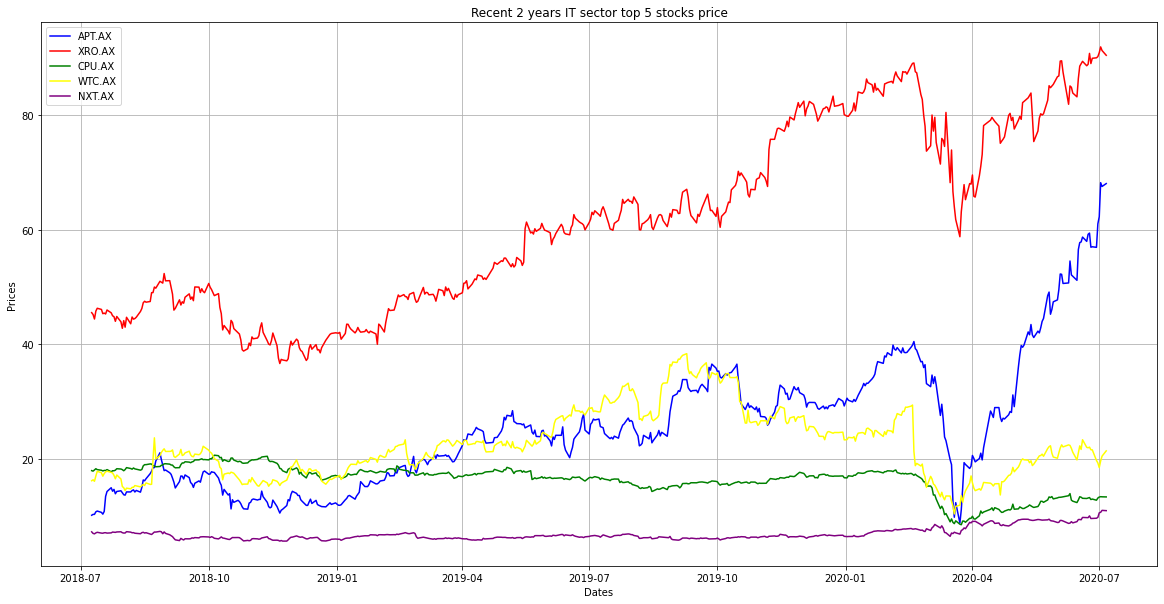

In [32]:
 plot_close(close_price, tickers, "IT")

In [33]:
# weighted average return calculation
def weight_ave(close_price, volume, tickers):
    market_cap = close_price * volume
    total = market_cap[tickers[0]] + market_cap[tickers[1]] + market_cap[tickers[2]] + market_cap[tickers[3]] + market_cap[tickers[4]]
    
    weights =pd.DataFrame(market_cap[tickers[0]] / total).rename(columns = {0:tickers[0]})
    weights[tickers[1]] = market_cap[tickers[1]] / total
    weights[tickers[2]] = market_cap[tickers[2]] / total
    weights[tickers[3]] = market_cap[tickers[3]] / total
    weights[tickers[4]] = market_cap[tickers[4]] / total
    weights = weights[1:]
    
    daily_return = close_price.pct_change(1).dropna()
    
    weighted_ave_return = daily_return[tickers[0]]*weights[tickers[0]] + daily_return[tickers[1]]*weights[tickers[1]] + daily_return[tickers[2]]*weights[tickers[2]] + daily_return[tickers[3]]*weights[tickers[3]] + daily_return[tickers[4]]*weights[tickers[4]]
    weighted_ave_return = weighted_ave_return.rolling(window = 20).mean().dropna()
    return weighted_ave_return


In [36]:
weighted_ave_return_IT = weight_ave(close_price_IT, volume_IT, tickers_IT)
weighted_ave_return_CS = weight_ave(close_price_CS, volume_CS, tickers_CS)
weighted_ave_return_UL = weight_ave(close_price_UL, volume_UL, tickers_UL)
weighted_ave_return_RE = weight_ave(close_price_RE, volume_RE, tickers_RE)
weighted_ave_return_HC = weight_ave(close_price_HC, volume_HC, tickers_HC)

In [50]:
market = ["^AXJO"]
market_data = yf.download(market, start="2018-07-07", end="2020-07-07")
market_data = pd.DataFrame(market_data["Close"])
#market_data
#market return
market_return = market_data["Close"].pct_change(1).dropna().rolling(window = 20).mean().dropna()
market_return

[*********************100%***********************]  1 of 1 completed


Date
2018-08-06   -0.000090
2018-08-07   -0.000020
2018-08-08    0.000436
2018-08-09    0.000245
2018-08-10    0.000091
                ...   
2020-06-30    0.000814
2020-07-01    0.000987
2020-07-02    0.000903
2020-07-03    0.000689
2020-07-06    0.000274
Name: Close, Length: 486, dtype: float64

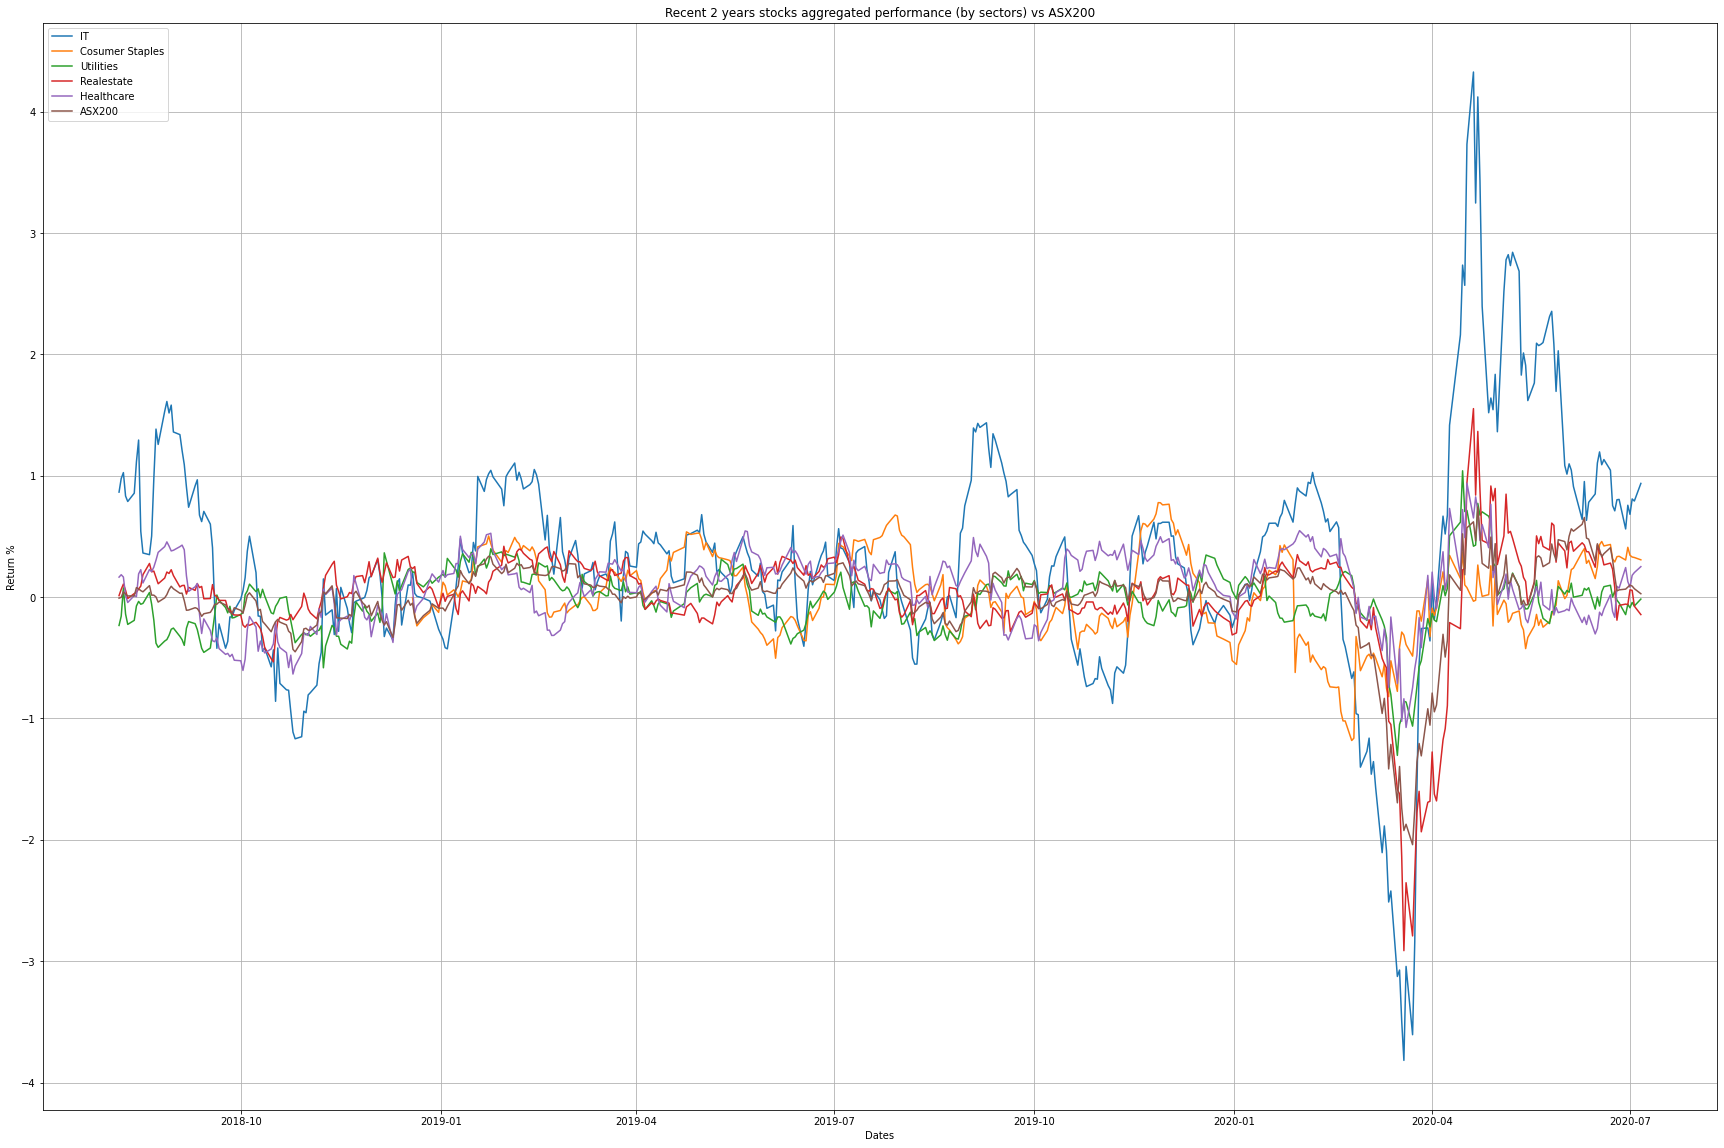

In [46]:
#plotting returns
fig = plt.figure(figsize=(30,20))
IT, = plt.plot(weighted_ave_return_IT.index, weighted_ave_return_IT*100, label = "IT")
CS, = plt.plot(weighted_ave_return_CS.index, weighted_ave_return_CS*100, label = "Cosumer Staples")
UL, = plt.plot(weighted_ave_return_UL.index, weighted_ave_return_UL*100, label = "Utilities")
RE, = plt.plot(weighted_ave_return_RE.index, weighted_ave_return_RE*100, label = "Realestate")
HC, = plt.plot(weighted_ave_return_HC.index, weighted_ave_return_HC*100, label = "Healthcare")
market, = plt.plot(market_return.index, market_return*100, label = "ASX200")

plt.title("Recent 2 years stocks aggregated performance (by sectors) vs ASX200")
plt.legend(handles=[IT, CS, UL, RE, HC, market], loc="upper left")
plt.xlabel("Dates")
plt.ylabel("Return %")
plt.grid()

In [47]:
#unemployment data (ask ryan why rename columns does not work)
unemployment = pd.read_excel("C:/Users/li116/OneDrive/Desktop/class/project/Mustard-Ferrets/abssheets/uemploy/6354001.xls",sheet_name = "Data1",header = 0, index_col = 0)[9:]

unemployment = pd.DataFrame(unemployment["Job Vacancies ;  Australia ;"]).dropna()
unemployment = unemployment.loc["2018":"2020"]
unemployment.columns = ["Australia unemployment"]
unemployment

,Australia unemployment
2018-02-15,215
2018-05-15,214.4
2018-08-15,231.3
2018-11-15,234.7
2019-02-15,234.7
2019-05-15,219.1
2019-08-15,226.3
2019-11-15,231.4
2020-02-15,229.5
2020-05-15,124.5


In [51]:
# unemployment merge market return dataset
merge=pd.merge(pd.DataFrame(market_return*1000),unemployment, how='outer', left_index=True, right_index=True).rename(columns={0:"weighted_ave_return"})
merge = merge.fillna(0).rename(columns={"Close": "Market"})
merge

,Market,Australia unemployment
2018-02-15,0.000000,215.0
2018-05-15,0.000000,214.4
2018-08-06,-0.089690,0.0
2018-08-07,-0.020010,0.0
2018-08-08,0.436278,0.0
...,...,...
2020-06-30,0.814375,0.0
2020-07-01,0.987192,0.0
2020-07-02,0.902835,0.0
2020-07-03,0.689252,0.0


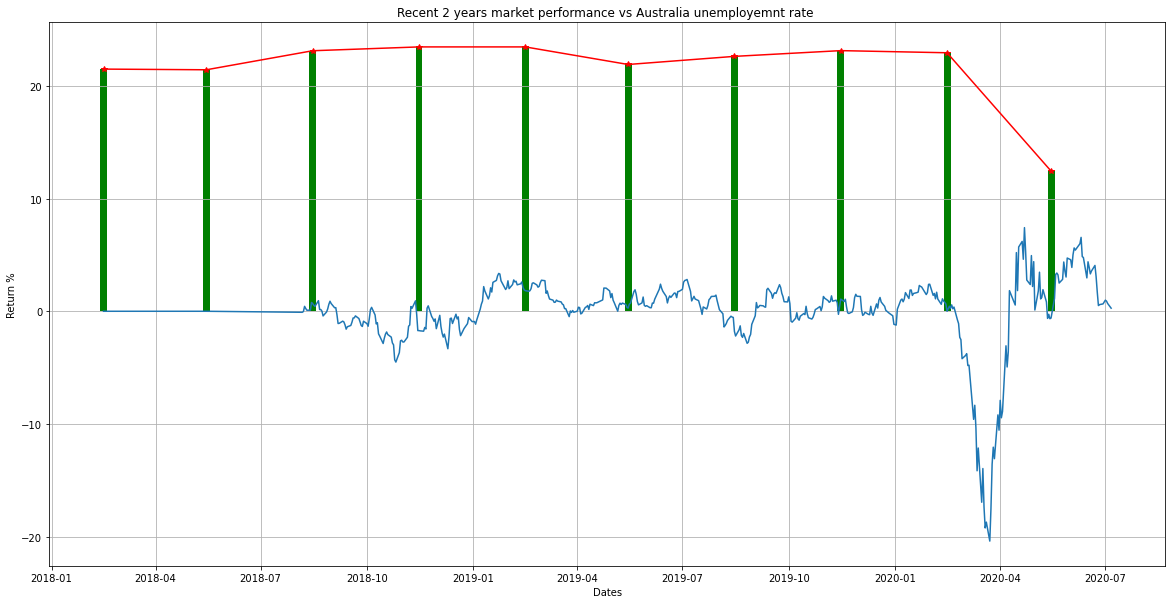

In [52]:
plt.figure(figsize=(20,10))
market, = plt.plot(merge.index, merge["Market"], label = "Market")
#market, = plt.plot(market_return.index, market_return*100, label = "ASX200")
year = merge.index
vacancies = merge["Australia unemployment"]
unemploy =plt.bar(year, vacancies/10, color="green", align="center", width = 6)
plt.title("Recent 2 years market performance vs Australia unemployemnt rate ")
plt.plot(unemployment/10, color='red', marker = "*")
#plt.legend(handles=[it, market], loc="upper left")
plt.xlabel("Dates")
plt.ylabel("Return %")
plt.grid()

In [53]:
#FX data (Australia main trading partners)
fx = pd.read_excel("C:/Users/li116/OneDrive/Desktop/class/project/Mustard-Ferrets/abssheets/fxrates/2018-current.xls",header = 1, index_col = 0)[9:]
fx = fx[["A$1=CNY", "A$1=JPY", "A$1=KRW", "A$1=USD", "A$1=INR", "A$1=NZD", "A$1=SDR", "A$1=TWD", "A$1=GBP", "A$1=MYR"]]

fx["A$1=CNY"] = fx["A$1=CNY"] / fx["A$1=CNY"][0]
fx["A$1=JPY"] = fx["A$1=JPY"] / fx["A$1=JPY"][0]
fx["A$1=KRW"] = fx["A$1=KRW"] / fx["A$1=KRW"][0]
fx["A$1=USD"] = fx["A$1=USD"] / fx["A$1=USD"][0]
fx["A$1=INR"] = fx["A$1=INR"] / fx["A$1=INR"][0]
fx["A$1=NZD"] = fx["A$1=NZD"] / fx["A$1=NZD"][0]
fx["A$1=SDR"] = fx["A$1=SDR"] / fx["A$1=SDR"][0]
fx["A$1=TWD"] = fx["A$1=TWD"] / fx["A$1=TWD"][0]
fx["A$1=GBP"] = fx["A$1=GBP"] / fx["A$1=GBP"][0]
fx["A$1=MYR"] = fx["A$1=MYR"] / fx["A$1=MYR"][0]

fx

,A$1=CNY,A$1=JPY,A$1=KRW,A$1=USD,A$1=INR,A$1=NZD,A$1=SDR,A$1=TWD,A$1=GBP,A$1=MYR
Title,,,,,,,,,,
2018-01-02,1,1,1,1,1,1,1,1,1,1
2018-01-03,0.997919,0.994,1.00094,0.99732,0.994591,1.00045,0.994548,0.99655,0.991033,0.995696
2018-01-04,1.00069,0.999321,1.00251,0.999745,0.996795,1.00118,0.998183,1,0.99931,0.996266
2018-01-05,0.999372,1.00408,1.00287,1.00255,0.996995,0.996006,1,1,0.99862,0.993101
2018-01-08,0.99892,1.00509,1.00537,1.00064,0.994391,0.992284,0.998546,0.996981,0.997413,0.989715
...,...,...,...,...,...,...,...,...,...,...
2020-06-25,0.95515,0.834145,0.994411,0.877249,1.04207,0.971678,0.903144,0.877102,0.95482,0.932276
2020-06-26,0.956956,0.834824,0.99238,0.878908,1.04107,0.970316,0.908777,0.87624,0.955682,0.934333
2020-06-29,0.955406,0.834031,0.991755,0.877759,1.04127,0.970679,0.90696,0.874946,0.958614,0.933036


Text(0.5, 1.0, 'FX rate witn top 10 Australia trading partners')

<Figure size 432x288 with 0 Axes>

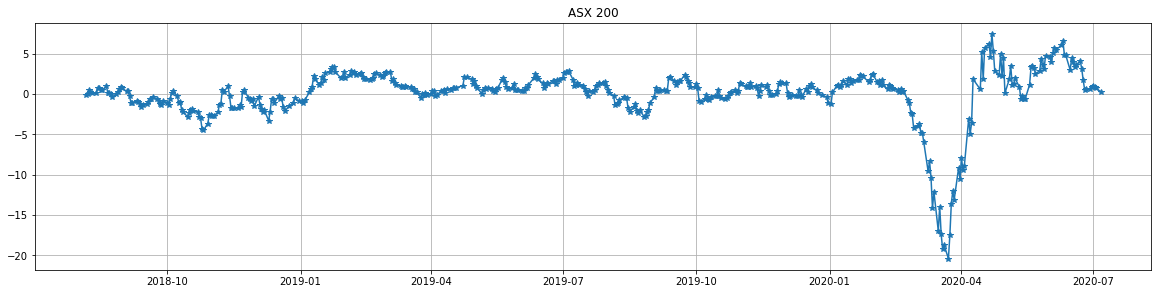

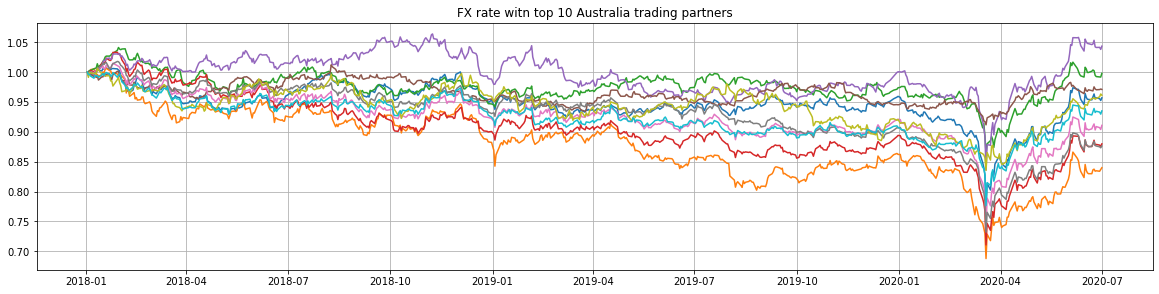

In [55]:
fig = plt.figure()

plt.figure(figsize=(20,10))
plt.subplot(2, 1, 1)
plt.plot(market_return*1000, marker = "*")
plt.grid()
plt.title("ASX 200")

plt.figure(figsize=(20,10))
plt.subplot(2, 1, 2)
plt.plot(fx)
plt.grid()
plt.title("FX rate witn top 10 Australia trading partners")
